In [69]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [70]:
edf=pd.read_csv('automobile.csv')
edf.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


<h2>Dataset Cleaning

In [71]:
#getting datas rows and no of columns
edf.shape

(205, 26)

In [72]:
#renaming columns for easy alias
edf.rename(columns={'num-of-cylinders':'ncylinder','num-of-doors':'ndoors'},inplace=True)
edf.head()

,symboling,normalized-losses,make,fuel-type,aspiration,ndoors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


<h3>Handling Missing Values

In [73]:
#Replacing string Nan with nan type
edf.replace('?',np.nan,inplace=True)

In [74]:
#Getting total null values in dataframe
edf.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
ndoors                2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
ncylinder             0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [75]:
edf.dropna(subset=['price'],how='any',axis=0,inplace=True)

<Axes: ylabel='Frequency'>

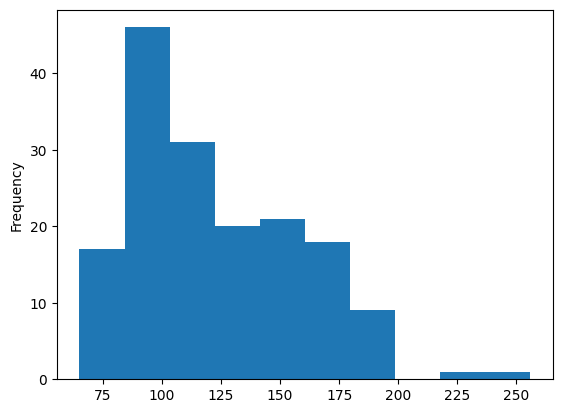

In [76]:
#data distribution of normalized-losses
edf['normalized-losses'].astype('float').plot(kind='hist')

In [77]:
#skewed therefore we use median to replace values
avg_normloss=edf['normalized-losses'].astype('float').median()
avg_bore=edf['bore'].astype('float').median()
avg_stroke=edf['stroke'].astype('float').median()
avg_horsepower=edf['horsepower'].astype('float').median()
avg_rpm=edf['peak-rpm'].astype('float').median()
#replacing nan values with median values
edf['normalized-losses'].replace(np.nan,avg_normloss,inplace=True)
edf['bore'].replace(np.nan,avg_bore,inplace=True)
edf['stroke'].replace(np.nan,avg_stroke,inplace=True)
edf['horsepower'].replace(np.nan,avg_horsepower,inplace=True)
edf['peak-rpm'].replace(np.nan,avg_rpm,inplace=True)

In [78]:
#no of doors is categorical so we use mode to replace nan values
most_doors=edf['ndoors'].value_counts().idxmax()
edf['ndoors'].replace(np.nan,most_doors,inplace=True)

In [79]:
edf.isnull().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
ndoors               0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
ncylinder            0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

<h5>Data type correction

In [80]:
edf[['horsepower','peak-rpm','price','normalized-losses']]=edf[['horsepower','peak-rpm','price','normalized-losses']].astype('int64')
edf[['bore','stroke']]=edf[['bore','stroke']].astype('float64')

In [81]:
edf.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
ndoors                object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
ncylinder             object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

In [82]:
edf.head()

,symboling,normalized-losses,make,fuel-type,aspiration,ndoors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


<H1>Data Normalization

In [83]:
#normalize the value of column length width height
edf['length']=edf['length']/edf['length'].max()
edf['width']=edf['width']/edf['width'].max()
edf['height']=edf['height']/edf['height'].max()

<Axes: ylabel='Frequency'>

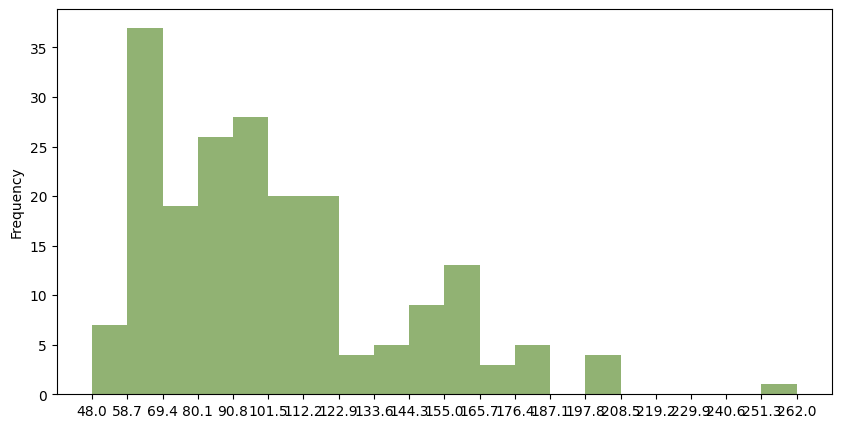

In [84]:
ct,ed=np.histogram(edf['horsepower'],bins=20)
plt.figure(figsize=(10,5))
edf['horsepower'].plot(kind='hist',bins=20,xticks=ed,color=['#488016'],alpha=0.6)

<h4>Horsepower is continous numerical values so it can be binned and transformed to categorical values

In [85]:
#creating a bin of 4 intervals for horsepower category
hpbin=np.linspace(min(edf['horsepower']),max(edf['horsepower']),4)
lbls=['low','medium','high']
hpbin

array([ 48.        , 119.33333333, 190.66666667, 262.        ])

In [86]:
#addinga horspower category column instead of hrsepower
edf['hp_cat']=pd.cut(edf['horsepower'],bins=hpbin,labels=lbls)
edf.drop(columns=['horsepower'],axis=1,inplace=True)

<Axes: xlabel='hp_cat', ylabel='count'>

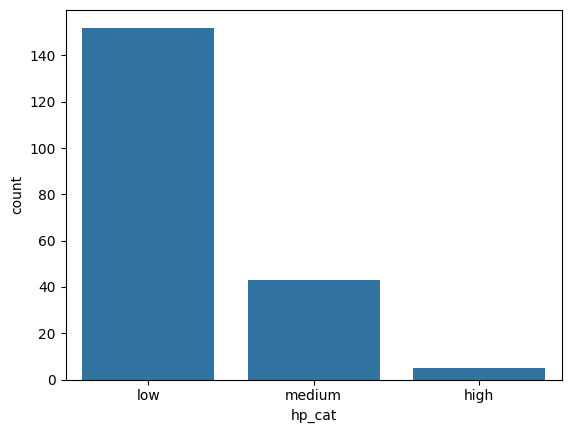

In [87]:
#comparing quantities of cars with different horsepower
sns.countplot(edf,x='hp_cat')

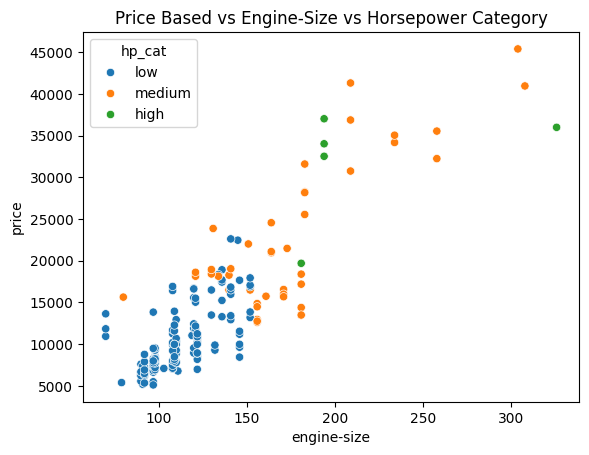

In [88]:
#Plotting engine-size against price of a car based on differnt horsepower
plt.title("Price Based vs Engine-Size vs Horsepower Category")
sns.scatterplot(edf,x='engine-size',y='price',hue='hp_cat')
plt.show()

In [89]:
edf.head()

,symboling,normalized-losses,make,fuel-type,aspiration,ndoors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,peak-rpm,city-mpg,highway-mpg,price,hp_cat
0,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,5000,21,27,13495,low
1,3,115,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,5000,21,27,16500,low
2,1,115,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,5000,19,26,16500,medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,5500,24,30,13950,low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,5500,18,22,17450,low


<h1>Comparing Price and Realted Features

<Axes: >

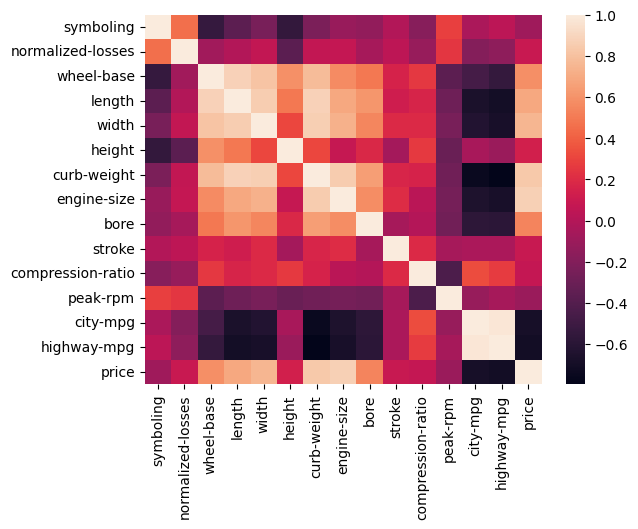

In [90]:
corr_df=edf.select_dtypes(['int64','float64']).corr()
sns.heatmap(corr_df,)

<h2>Visualization for features related to price feature</h2>
<h5>plottig Price agains mileage,engine-size,bore

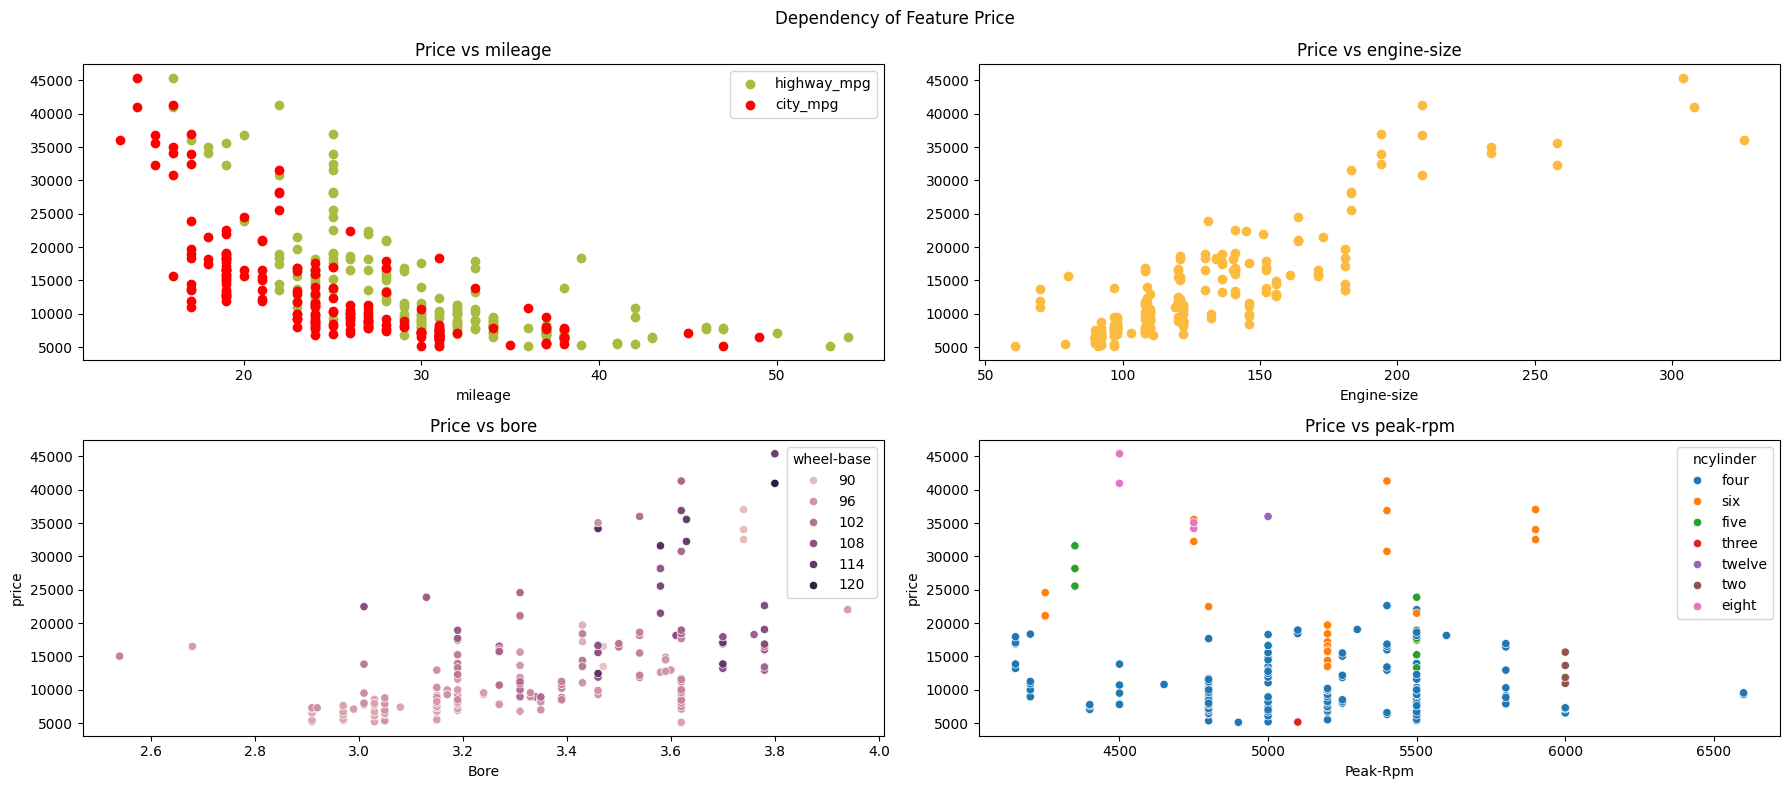

In [91]:
fig,(axs0,axs1)=plt.subplots(nrows=2,ncols=2,figsize=(18,8))
axs0[0].set_title('Price vs mileage')
axs0[0].set_xlabel('mileage')
axs0[1].set_title('Price vs engine-size')
axs0[1].set_xlabel('Engine-size')
axs1[0].set_title('Price vs bore')
axs1[0].set_xlabel('Bore')
axs1[1].set_title('Price vs peak-rpm')
axs1[1].set_xlabel('Peak-Rpm')

axs0[0].scatter(edf['highway-mpg'],edf['price'],color='#aabb3f',label='highway_mpg')
axs0[0].scatter(edf['city-mpg'],edf['price'],color='red',label='city_mpg')
axs0[1].scatter(edf['engine-size'],edf['price'],color='#fcbb3f')
sns.scatterplot(edf,x='bore',y='price',hue='wheel-base',ax=axs1[0])
sns.scatterplot(edf,x='peak-rpm',y='price',hue='ncylinder',ax=axs1[1])

axs0[0].legend()
plt.suptitle('Dependency of Feature Price')
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()


<h4>INSIGHTS</h4>
<h7>We can see that price feature is not quite dependent on peak-rpm feature<br>
<h7>Also cars with larger wheel base has high bore value but doesnt affects the cars price.

<h1>Categorical Visualization

In [92]:
edf.select_dtypes('object')

,make,fuel-type,aspiration,ndoors,body-style,drive-wheels,engine-location,engine-type,ncylinder,fuel-system
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


<h2>Types of Vehicle Production by a Make 

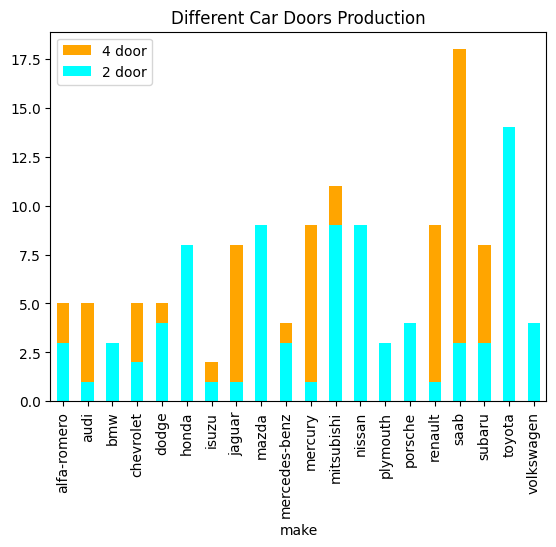

In [93]:
fig,ax=plt.subplots()
maker4_df=edf[edf['ndoors']=='four'].groupby(['make'])['make'].agg('count')
maker2_df=edf[edf['ndoors']=='two'].groupby(['make'])['make'].agg('count')
maker4_df.plot(kind='bar',ax=ax,color='orange',label='4 door')
maker2_df.plot(kind='bar',ax=ax,color='cyan',label='2 door')
plt.title('Different Car Doors Production')
plt.legend()
plt.show()

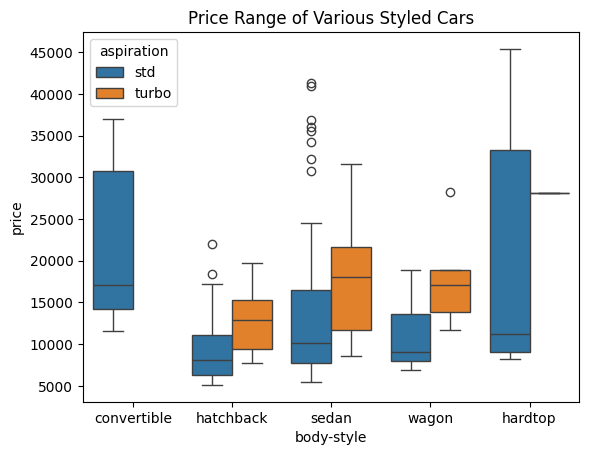

In [94]:
plt.title('Price Range of Various Styled Cars')
sns.boxplot(edf,x='body-style',y='price',hue='aspiration')
plt.show()

##Insight
cars with Body Type Convertible and Hardtop mostly consist of Std apspiration Engine
amd ranges from medium to max range of price

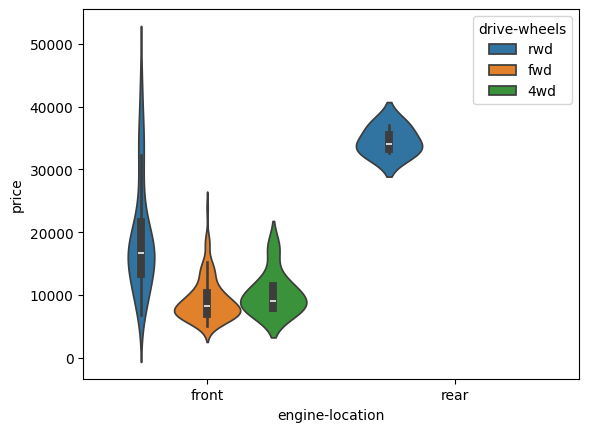

In [95]:
sns.violinplot(edf,x='engine-location',y='price',hue='drive-wheels')
plt.show()

##Insights
Cars having Rear engine provides only rwd and comes in higher prices only.
Among cars having front engine, we can say that cars with 4wd costs more than fwd.
 

<h4>Body style vs Fuel Efficiency</h4>

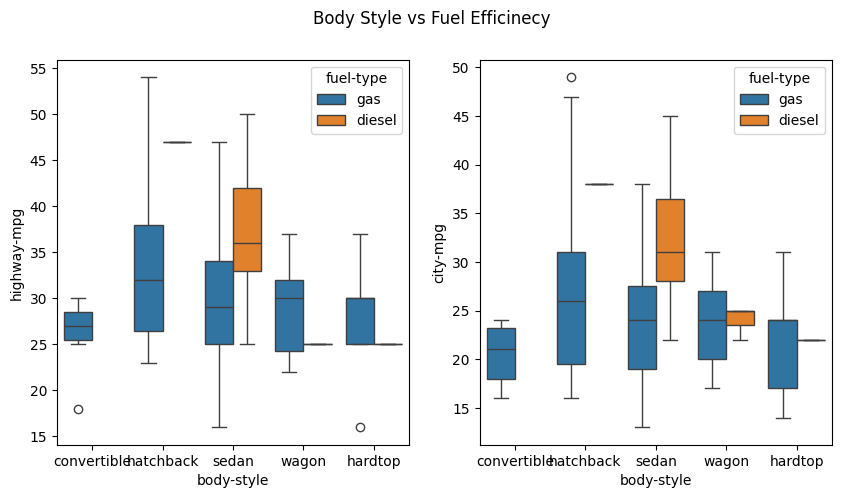

In [96]:
fig,(ax1)=plt.subplots(1,2,figsize=(10,5))
plt.suptitle('Body Style vs Fuel Efficinecy')
sns.boxplot(edf,x='body-style',y='highway-mpg',hue='fuel-type',ax=ax1[0])
sns.boxplot(edf,x='body-style',y='city-mpg',hue='fuel-type',ax=ax1[1])
plt.show()

<h4>Curb Weight exploration for pricing

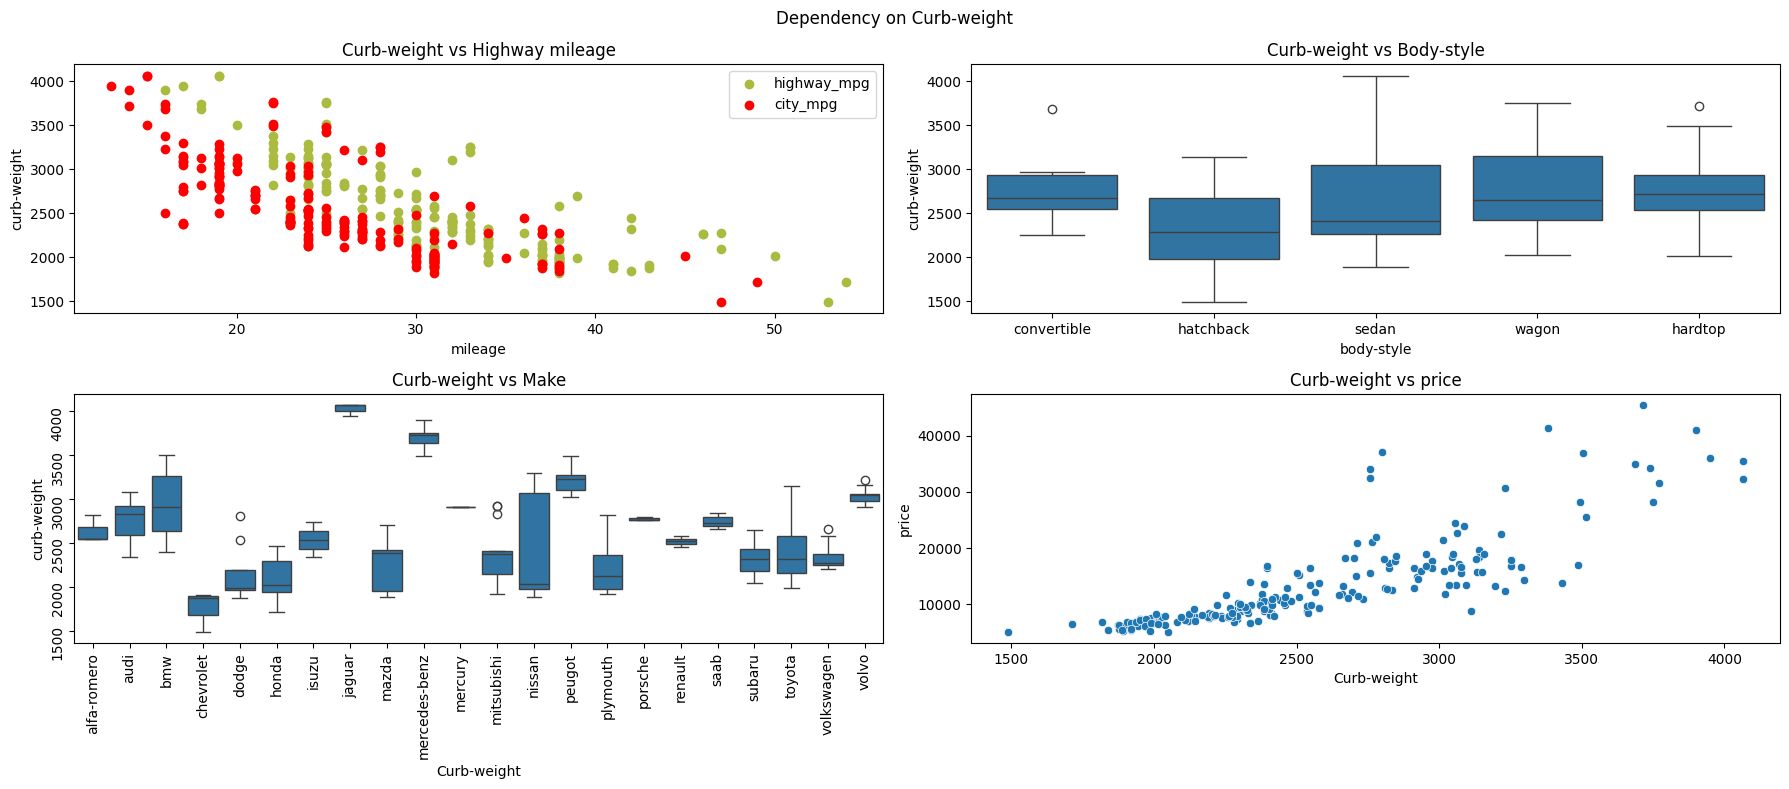

In [97]:
fig,(axs0,axs1)=plt.subplots(nrows=2,ncols=2,figsize=(18,8))
axs0[0].set_title('Curb-weight vs Highway mileage')
axs0[0].set_xlabel('mileage')
axs0[0].set_ylabel('curb-weight')
axs0[1].set_title('Curb-weight vs Body-style')
axs1[0].set_title('Curb-weight vs Make')
axs1[0].set_xlabel('Curb-weight')
axs1[1].set_title('Curb-weight vs price')
axs1[1].set_xlabel('Curb-weight')

axs0[0].scatter(edf['highway-mpg'],edf['curb-weight'],color='#aabb3f',label='highway_mpg')
axs0[0].scatter(edf['city-mpg'],edf['curb-weight'],color='red',label='city_mpg')
sns.boxplot(edf,x='body-style',y='curb-weight',ax=axs0[1])
sns.boxplot(edf,x='make',y='curb-weight',ax=axs1[0])
sns.scatterplot(edf,x='curb-weight',y='price',ax=axs1[1])

axs1[0].tick_params(rotation=90)
axs0[0].legend()
plt.suptitle('Dependency on Curb-weight')
plt.subplots_adjust(hspace=0.3)
plt.tight_layout()
plt.show()

<h4>Insights</h4>
We get Curb-weight has negative relation with mileage and positive relation with price</br>
Therefore higher the curb-weight increases the price of car but may have a lower highway
and city mileage.